<h1>Project 2 - Boston Dataset Using SVM</h1>

<h3>Environment Setup</h3>
<p>Lets first pull in some tools we will need for downloading and working with the dataset.</p>

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

<h3>Import Dataset</h3>
<p>Now that we have our basic tools in place, lets pull in the data set and see what it consists of.</p>

In [3]:
from sklearn.datasets import load_boston
dataSet = load_boston()

In [4]:
print(dataSet.data.shape)

(506, 13)


<p>Above we can see the data set consists of 506 instances, each with 13 features. Lets get a more detailed description.</p>

In [5]:
print(dataSet.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<p>As we can see above, the target value will be the MEDV feature, or the meadian value of owner-occupied homes. We will use the other features to predict this feature. It is important to note that there are no missing attribute values in this data set. Before we can do much more with the data, we need to conver it to a pandas dataframe.</p>

In [6]:
pd_DataSet = pd.DataFrame(dataSet.data)
pd_DataSet.columns = dataSet.feature_names
pd_DataSet['MEDV'] = dataSet.target

In [7]:
print(pd_DataSet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None


In [8]:
pd_DataSet.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h3>Initial Data Set Exploration</h3>
<p>The dataset has now successfully been converted to a pandas dataframe. Now lets explore the data a bit to see if we see any obvious correlations. Lets start with a histogram.</p>

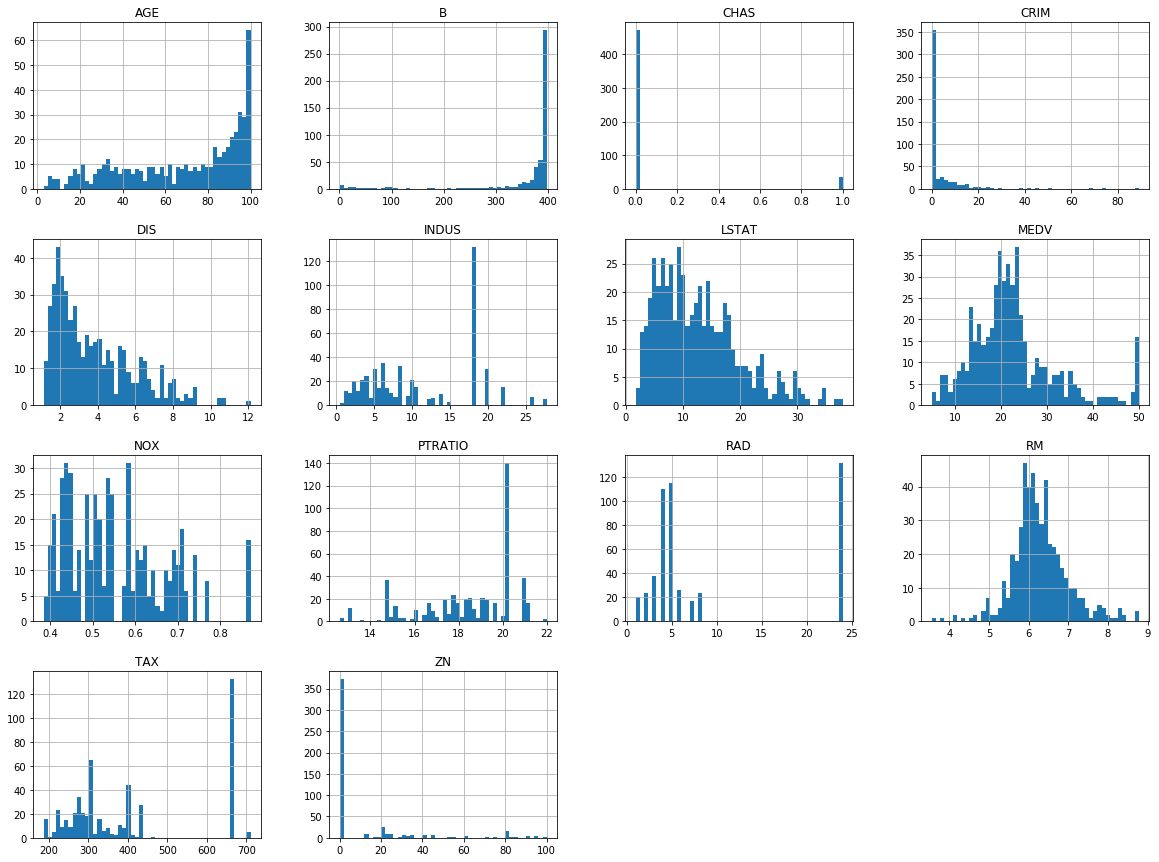

In [9]:
pd_DataSet.hist(bins = 50, figsize=(20,15))
plt.show()

<p>We see there are several tail-heavy features, we will normalize these to help mitigate this to maximize model performance. But first, lets split the data into a test set and a training set.</p>

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(pd_DataSet, test_size=0.2, random_state=42)

<p>Now that we have a training and test set, we can start treating the training set to maximize performance.</p>

In [12]:
train_cpy = train_set.copy()

<p>Let's check for any obvious linear correlation as is.</p>

In [13]:
corr_matrix = train_cpy.corr()

In [14]:
print(corr_matrix["MEDV"].sort_values(ascending=False))

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64


<p>The RM, or average number of rooms per dwelling, feature seems to be strongly positively correlated to our target feature. The more rooms, the higher the price. LSTAT is also very negatively correlated to MEDV. This means the lower the percentage of lower status of the population, the higher MEDV is.</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12375d5f8>,
      dtype=object)

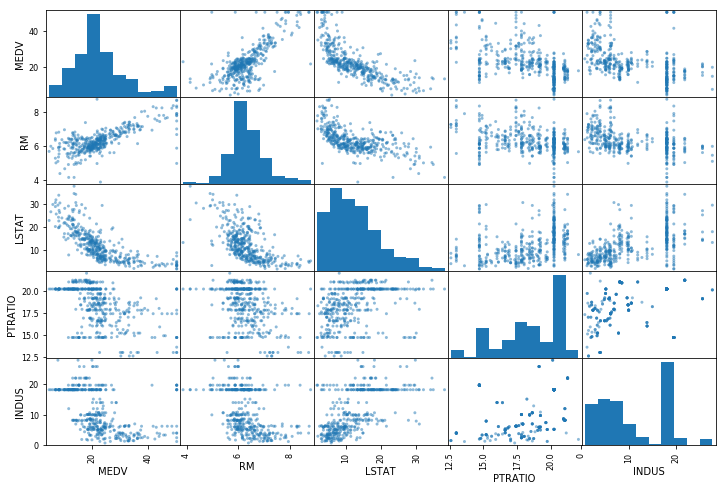

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "LSTAT", "PTRATIO", "INDUS"]
scatter_matrix(train_cpy[attributes],figsize=(12,8))

<p>The above scatter matrix visualizes the relationships between LSTAT, RM, PTRATIO, INDUS, and MEDV features. We can readily see the linear correlation between MEDV and RM. There could also be a non-linear correlation between LSTAT and MEDV. </p>

<h3>Support Vector Machine (SVM) Models</h3>
<p>As the text mentions, Support Vector Machines (SVMs) are very versatile and capable of both linear and nonlinear regression. We will try both linear and nonlinear models on the dataset, as it is. Then we will try to improve the model my normalizing the data etc.</p>

In [37]:
from sklearn.svm import LinearSVR

x_train = pd.DataFrame(np.c_[train_set['LSTAT'], train_set['RM']], columns = ['LSTAT','RM'])
y_train = train_set["MEDV"]
x_test = pd.DataFrame(np.c_[test_set['LSTAT'], test_set['RM']], columns = ['LSTAT','RM'])
y_test = test_set["MEDV"]
svmRegModel = LinearSVR(epsilon=1.5,max_iter=10000)
svmRegModel.fit(x_train,y_train)


LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
     random_state=None, tol=0.0001, verbose=0)

<p>The SVM regression model has been trained on the LSTAT and RM features of the train set. Lets do some cross validation scores to see how the model is performing.</p>

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
linModelScores = cross_val_score(svmRegModel, x_train,y_train,scoring="neg_mean_squared_error",cv=10)
linRmseScores = np.sqrt(-linModelScores)

def displayScores(scores):
    print("Scores: ",scores )
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

displayScores(linRmseScores)

Scores:  [4.99410432 5.37006569 5.88904166 6.60489715 5.28299676 6.20714379
 5.72770044 4.87320215 4.44872573 6.58412207]
Mean:  5.598199974220472
Standard Deviation:  0.6943267354821019


<p>The standard deviation doesn't look too terrible, but lets compute an accuracy score using r2_score from scikit. This will return a max accuracy of 1.0</p>

In [18]:
linModelCrossPredict = cross_val_predict(svmRegModel,x_train,y_train,cv=10)
from sklearn.metrics import r2_score
accuracy = r2_score(y_train,linModelCrossPredict)
print("accuracy: ",accuracy)

accuracy:  0.6337437073715841


<p>The model is performing at 63%. This is not ideal, but may be improved with data normalization and hyper paramter tweaking. Before we explore those avenues, lets try a non linear model to see if it does any better.</p>

In [19]:
from sklearn.svm import SVR

polyRegModel = SVR(kernel="poly",degree=2,C=100,epsilon=0.1,gamma='auto')
polyRegModel.fit(x_train,y_train)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
polyModelScores = cross_val_score(polyRegModel,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
polyRmseScores = np.sqrt(-polyModelScores)

In [20]:
displayScores(polyModelScores)

Scores:  [-20.55650127 -16.07302166 -20.47590658 -49.3579343  -19.18910741
 -19.22887598 -19.74722184 -19.40871651 -13.79976426 -35.39761142]
Mean:  -23.32346612441169
Standard Deviation:  10.220501101101902


In [21]:
polyModelCrossPredict = cross_val_predict(polyRegModel,x_train,y_train,cv=10)

In [22]:
polyAccuracy = r2_score(y_train,polyModelCrossPredict)

In [23]:
print("accuracy: ",polyAccuracy)


accuracy:  0.7311482817006502


<p>While it takes much longer than the linear model to run, the polynomial regression model of degree 2 has improved the accuracy by 10%! Lets see what happens to both models when the data is normalized.</p>

In [24]:
from sklearn.preprocessing import StandardScaler

normalizeFeatures= ['LSTAT', 'RM']
x_train[normalizeFeatures] = StandardScaler().fit_transform(x_train[normalizeFeatures])

svmRegModel = LinearSVR(epsilon=1.5,max_iter=10000)
svmRegModel.fit(x_train,y_train)
linModelScores = cross_val_score(svmRegModel, x_train,y_train,scoring="neg_mean_squared_error",cv=10)
linRmseScores = np.sqrt(-linModelScores)

displayScores(linRmseScores)

Scores:  [4.89833644 5.23032174 5.81980449 7.25348051 5.24762591 6.38354482
 5.62727452 4.9455399  4.39480624 6.66627271]
Mean:  5.646700727370279
Standard Deviation:  0.845345928335893


In [25]:
linModelCrossPredict = cross_val_predict(svmRegModel,x_train,y_train,cv=10)
accuracy = r2_score(y_train,linModelCrossPredict)
print("accuracy: ",accuracy)

accuracy:  0.6244829432574763


<p>Normalizing the data hasn't really improved the linear model any at all. Lets try the polynomial one and see if there's any improvement.</p>

In [27]:
polyRegModel = SVR(kernel="poly",degree=2,C=100,epsilon=0.1,gamma='auto')
polyRegModel.fit(x_train,y_train)
polyModelCrossPredict = cross_val_predict(polyRegModel,x_train,y_train,cv=10)
polyAccuracy = r2_score(y_train,polyModelCrossPredict)
print("accuracy: ",polyAccuracy)

accuracy:  0.26242314063737715


<p>The polynomial model really does not like the normalized data. Lets revert this and try a gridsearch on the polynomial model to see if we can make it any better.</p>

In [31]:
x_train = pd.DataFrame(np.c_[train_set['LSTAT'], train_set['RM']], columns = ['LSTAT','RM'])
y_train = train_set["MEDV"]

polyRegModel.fit(x_train,y_train)
polyModelCrossPredict = cross_val_predict(polyRegModel,x_train,y_train,cv=10)
polyAccuracy = r2_score(y_train,polyModelCrossPredict)
print("accuracy: ",polyAccuracy)

accuracy:  0.7311482817006502


<p>We are now back to where we were. Now lets set up gridsearch to try different degrees and C-values.</p>

In [29]:
from sklearn.model_selection import GridSearchCV

parameter_grid = [
    {'degree': [2,3], 'C':[.01, 100]}
]
opPolyRegModel = SVR(kernel="poly",gamma='auto',epsilon=0.1)

gridSearch = GridSearchCV(opPolyRegModel,parameter_grid,cv=3,scoring='neg_mean_squared_error',n_jobs=-1,refit=True,)
gridSearch.fit(x_train,y_train)

/Users/MattSchnider/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'degree': [2, 3], 'C': [0.01, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [33]:
print(gridSearch.best_params_)

{'C': 0.01, 'degree': 3}


<p>Lets take the best parameters from the gridsearch and see how we do.</p>

In [34]:
polyRegModel = SVR(kernel="poly",degree=3,C=0.01,epsilon=0.1,gamma='auto')
polyRegModel.fit(x_train,y_train)
polyModelCrossPredict = cross_val_predict(polyRegModel,x_train,y_train,cv=10)
polyAccuracy = r2_score(y_train,polyModelCrossPredict)
print("accuracy: ",polyAccuracy)

accuracy:  0.7476186291879844


<p>Almost 75%! This is looking really good! Let's try this model on our test set.</p>

In [38]:
polyModelCrossPredict = cross_val_predict(polyRegModel,x_test,y_test,cv=10)
polyAccuracy = r2_score(y_test,polyModelCrossPredict)
print("accuracy: ",polyAccuracy)

accuracy:  0.7004514685290026
